# **EDA for Numerical Data**

**Response variable:** Diabetes_binary

**Numerical predictor variables:** BMI, MentHlth, PhysHlth, Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, DiabetesPedigreeFunction

In [ ]:
# Extract only the numeric variables
numDF = pd.DataFrame(CleanData[["BMI", "Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin", "DiabetesPedigreeFunction", "MentHlth", "PhysHlth"]])

### **Uni-Variate Data Exploration**

In [ ]:
numDF.describe()

,BMI,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,DiabetesPedigreeFunction,MentHlth,PhysHlth
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,31.148800,5.448000,130.905000,73.189000,30.18100,171.021000,0.555601,6.686000,7.075000
std,8.159914,2.925039,20.473572,8.484295,7.21556,71.953846,0.199569,8.139758,8.812096
min,0.000000,0.000000,56.000000,24.000000,7.00000,15.000000,0.085000,0.000000,0.000000
25%,25.975000,3.000000,121.000000,70.000000,26.00000,120.000000,0.473600,0.000000,1.000000
50%,30.000000,6.000000,136.000000,74.000000,30.00000,172.000000,0.557000,4.000000,4.000000
75%,35.000000,8.000000,143.000000,78.000000,34.00000,213.000000,0.615600,9.000000,9.000000
max,89.000000,17.000000,198.000000,110.000000,60.00000,744.000000,2.329000,30.000000,30.000000


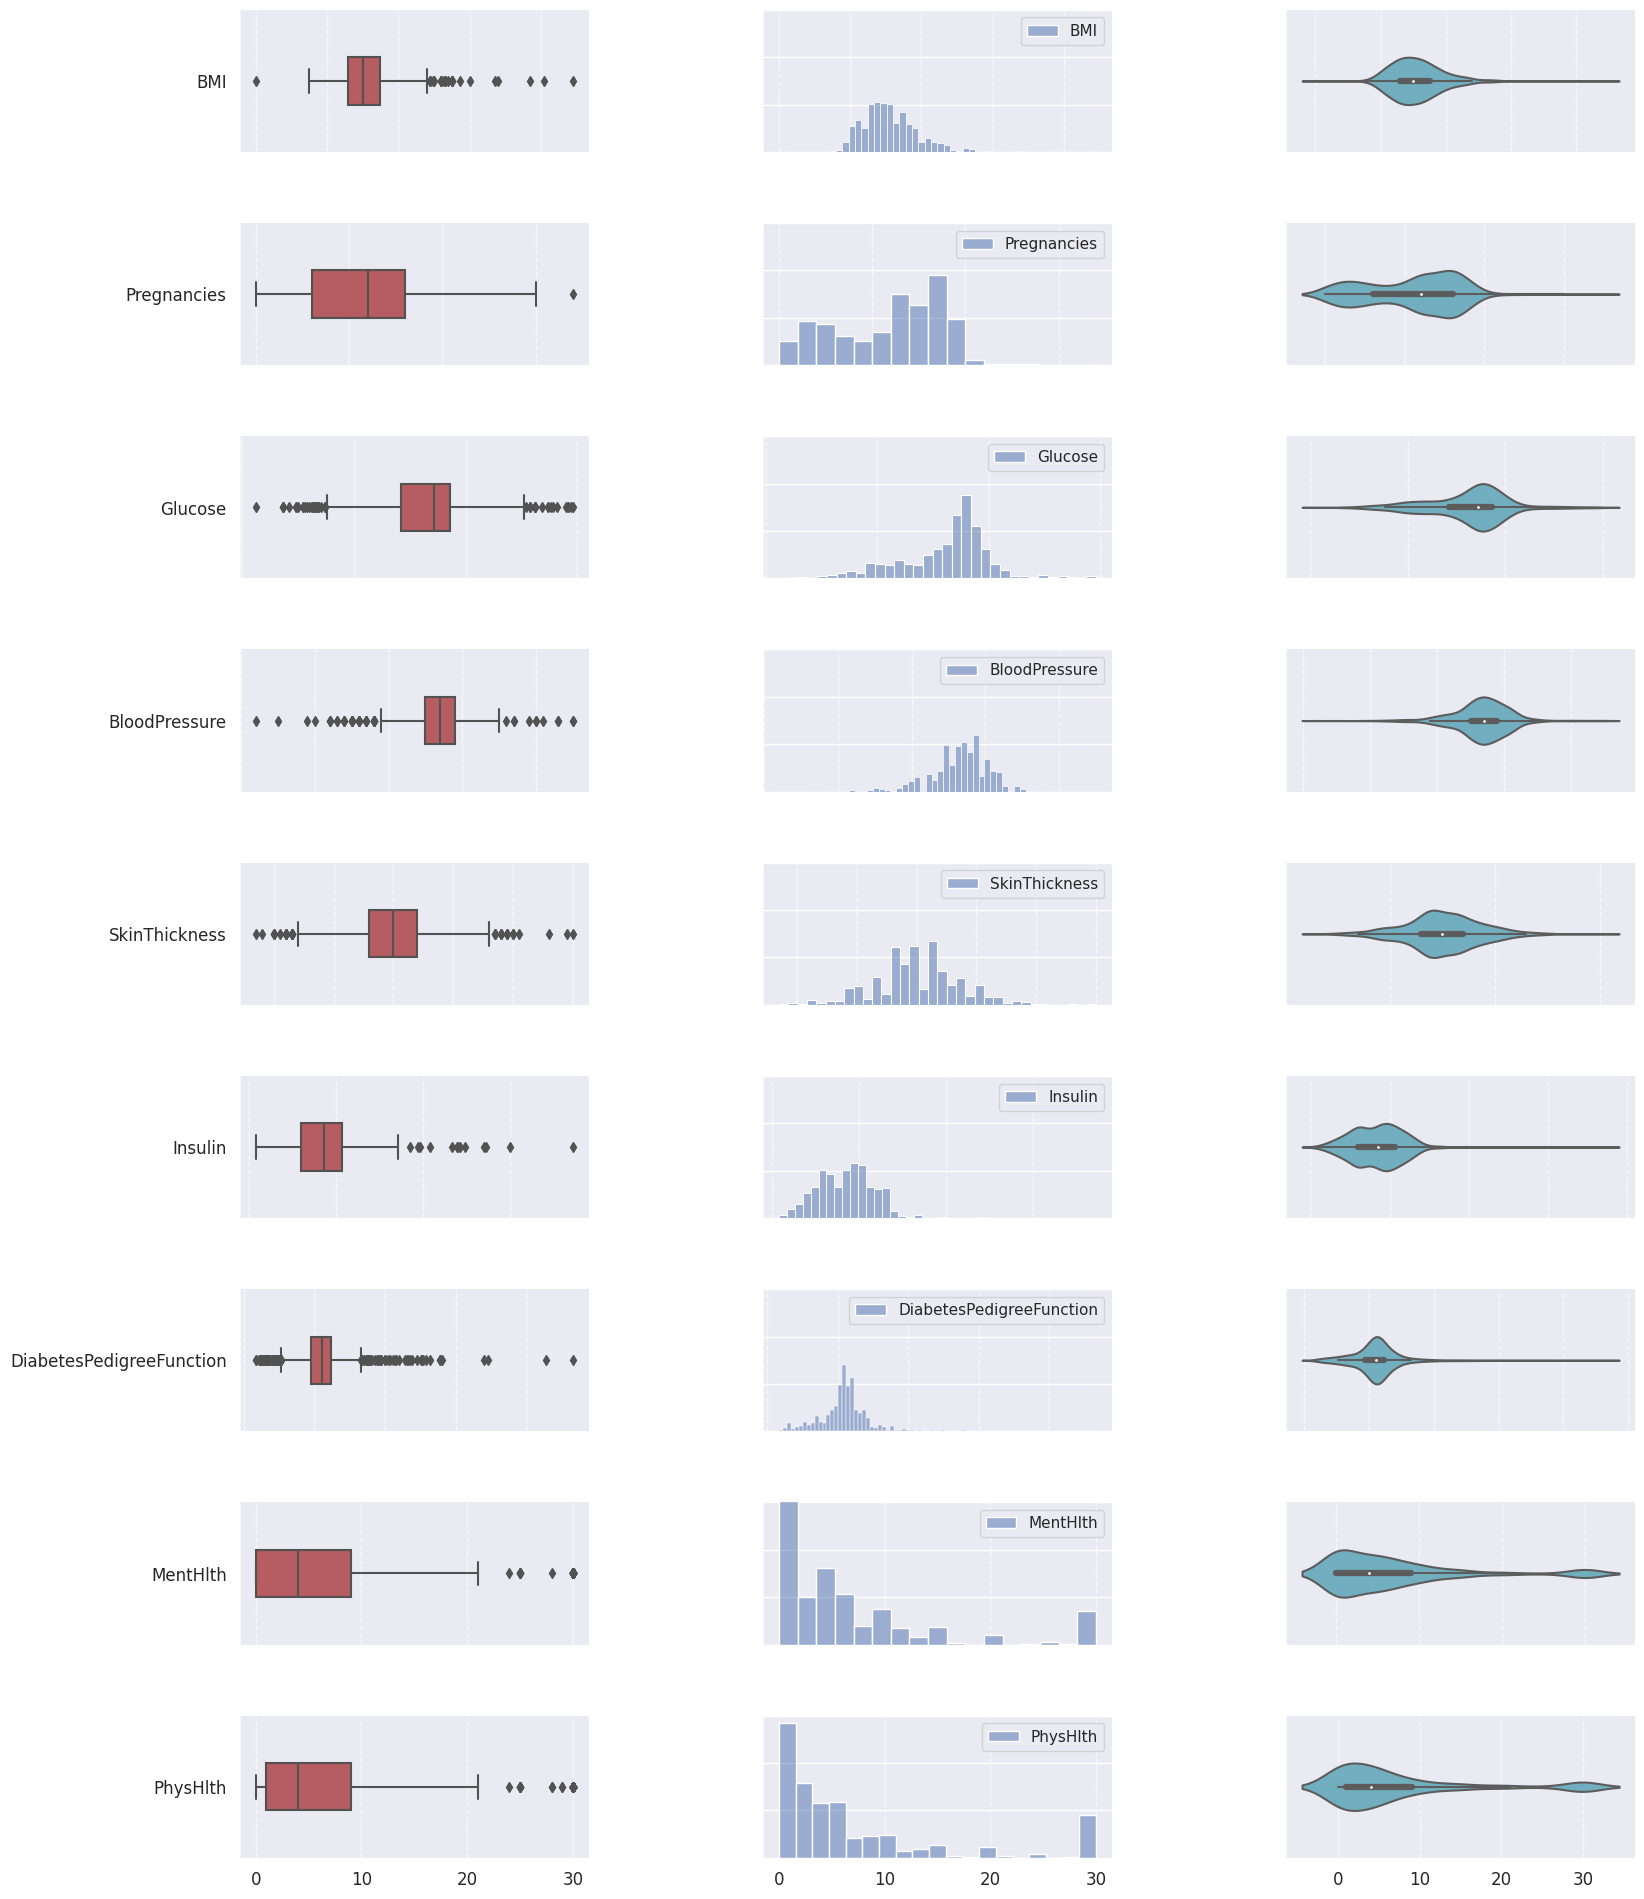

In [ ]:
# Draw the distributions (boxplot, histogram, violin plot) of all variables
f, axes = plt.subplots(9, 3, figsize=(18, 24))

count = 0
for var in numDF:
    sb.boxplot(data=numDF[[var]], orient="h", ax=axes[count, 0], color='r')
    axes[count, 0].set_ylim([-1.2, 1.2])
    axes[count, 0].set_xlabel('')
    axes[count, 0].set_ylabel('')
    sb.histplot(data=numDF[[var]], ax=axes[count, 1], color='m')
    axes[count, 1].set_ylim([0, 300])
    axes[count, 1].set_xlabel('')
    axes[count, 1].set_ylabel('')
    sb.violinplot(data=numDF[[var]], orient="h", ax=axes[count, 2], color='c')
    axes[count, 2].set_ylim([-1.2, 1.2])
    axes[count, 2].set_xlabel('')
    axes[count, 2].set_ylabel('')
    count += 1

# Standardize x-axis and y-axis for all subplots
for ax in axes.flat:
    ax.label_outer()
    ax.tick_params(axis='both', which='major', labelsize=12)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_linewidth(0.5)
    ax.spines['left'].set_linewidth(0.5)
    ax.grid(axis='x', linestyle='--', alpha=0.7)

plt.subplots_adjust(hspace=0.5, wspace=0.5)

### **Bi-Variate Data Exploration**

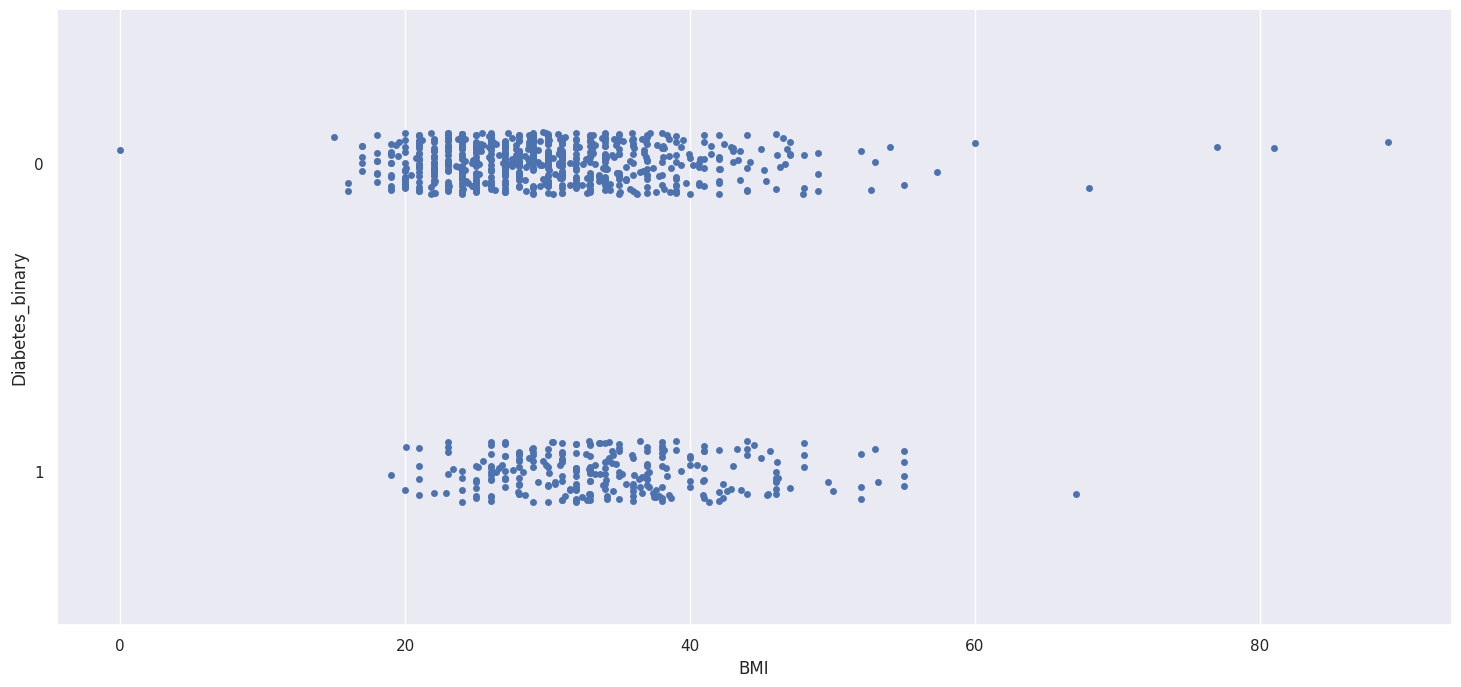

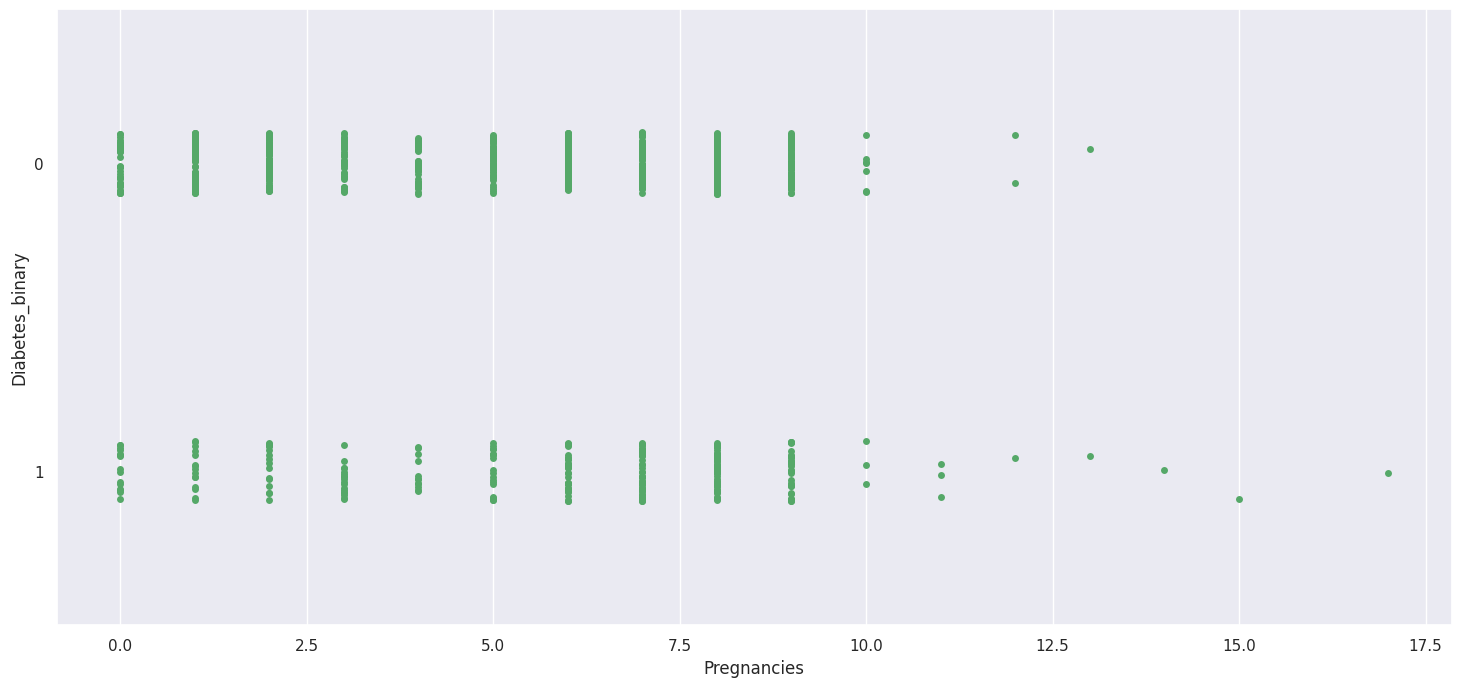

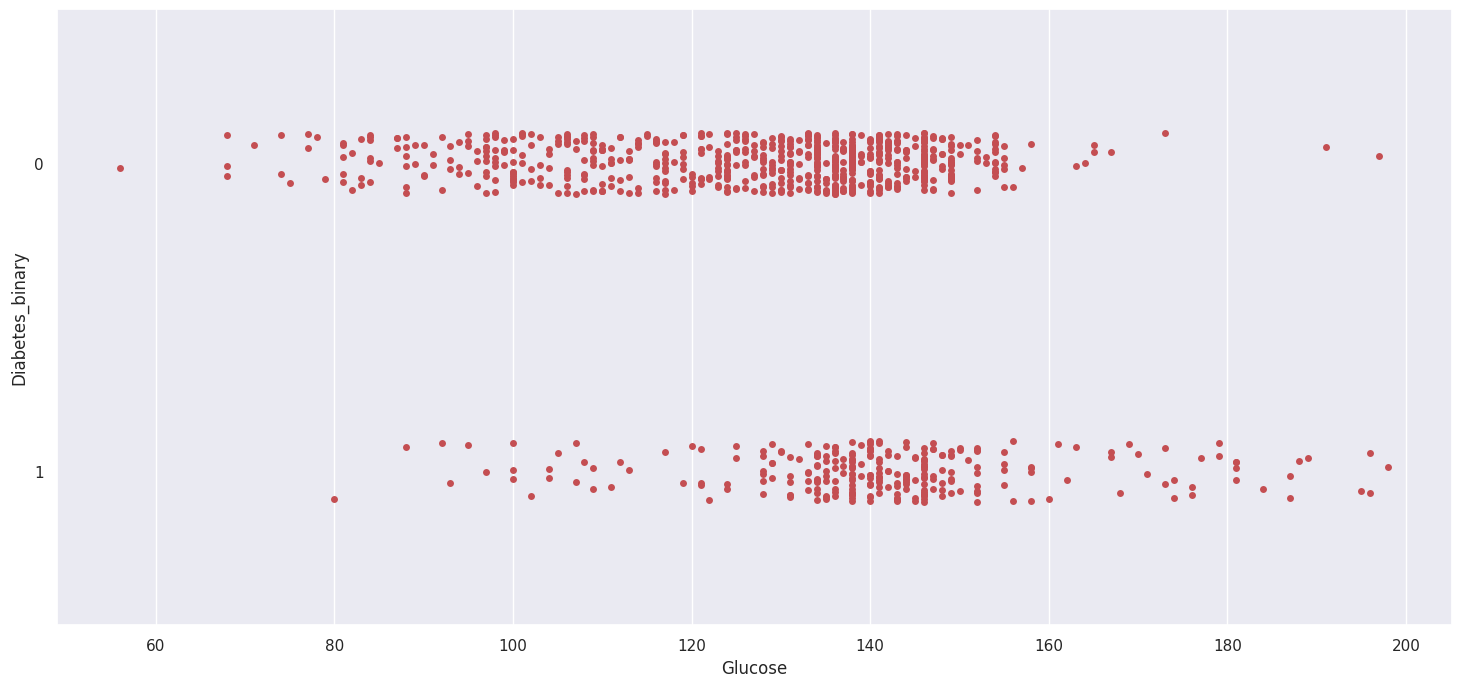

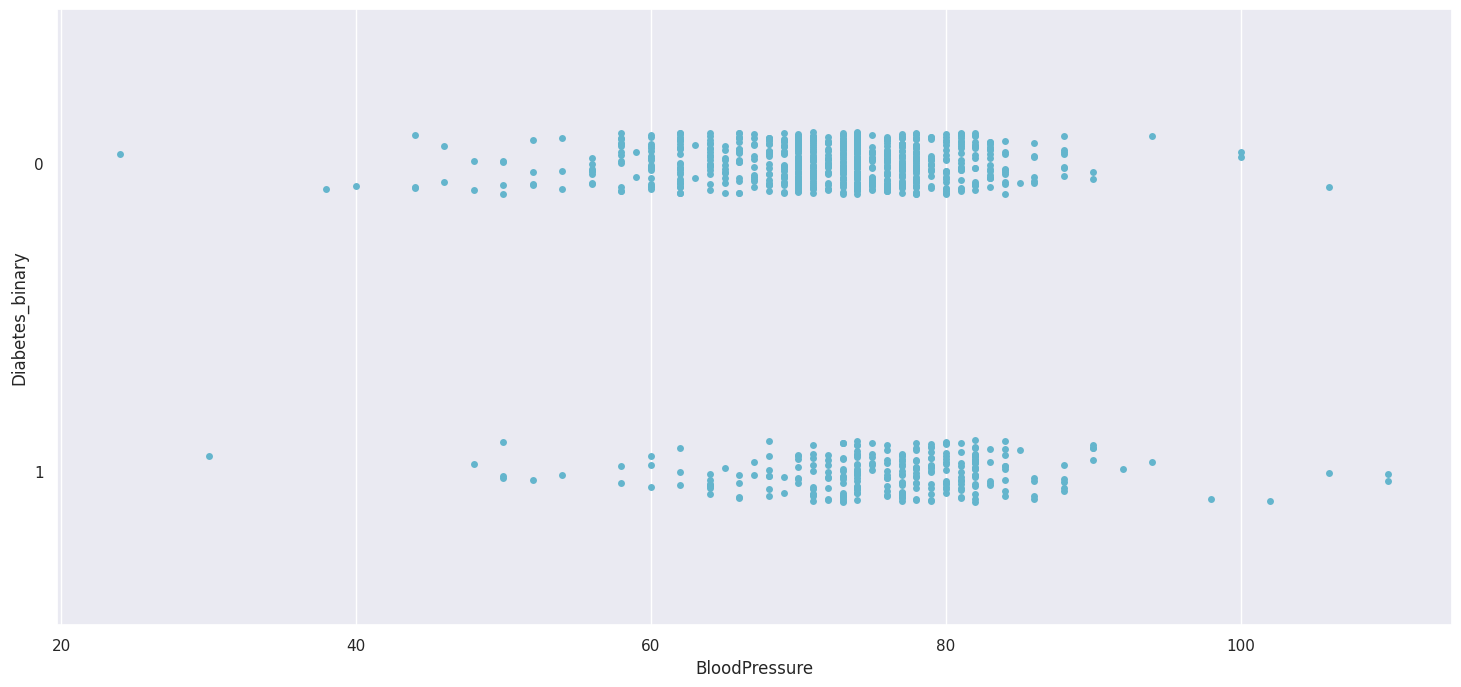

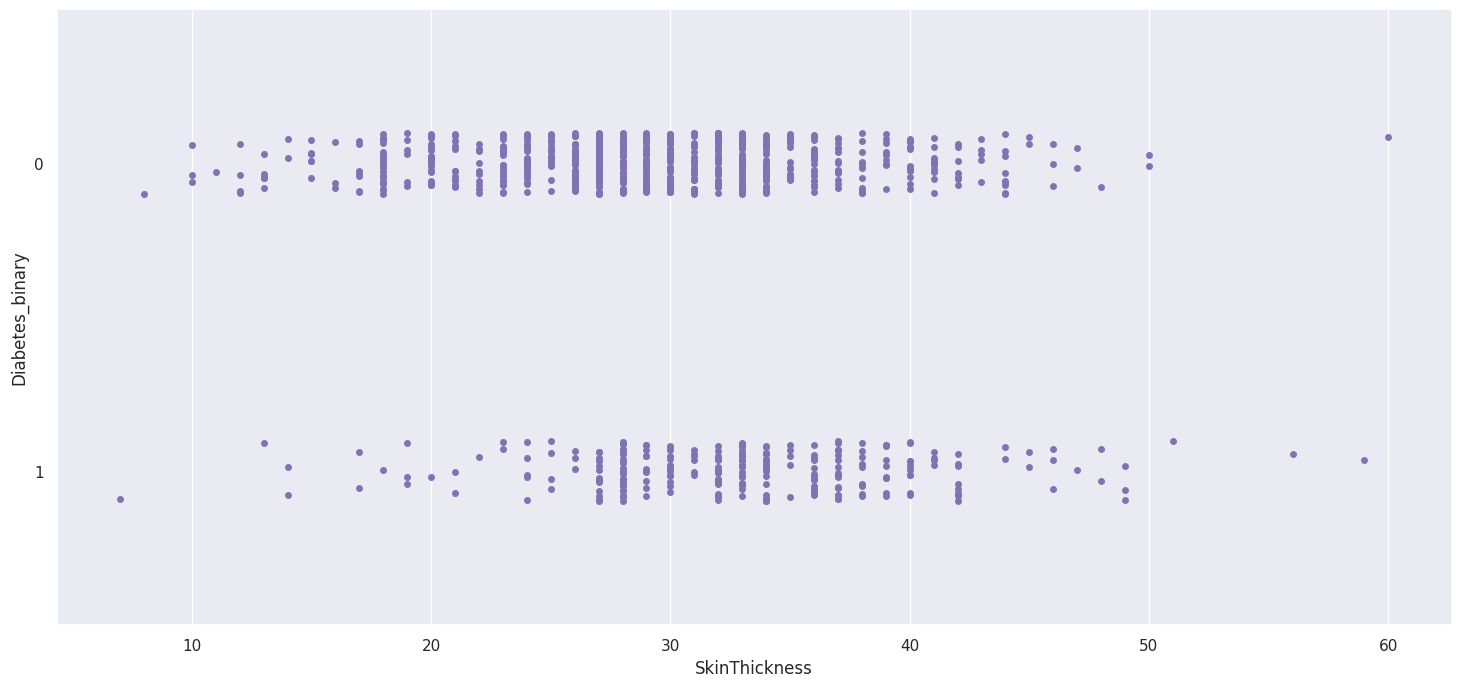

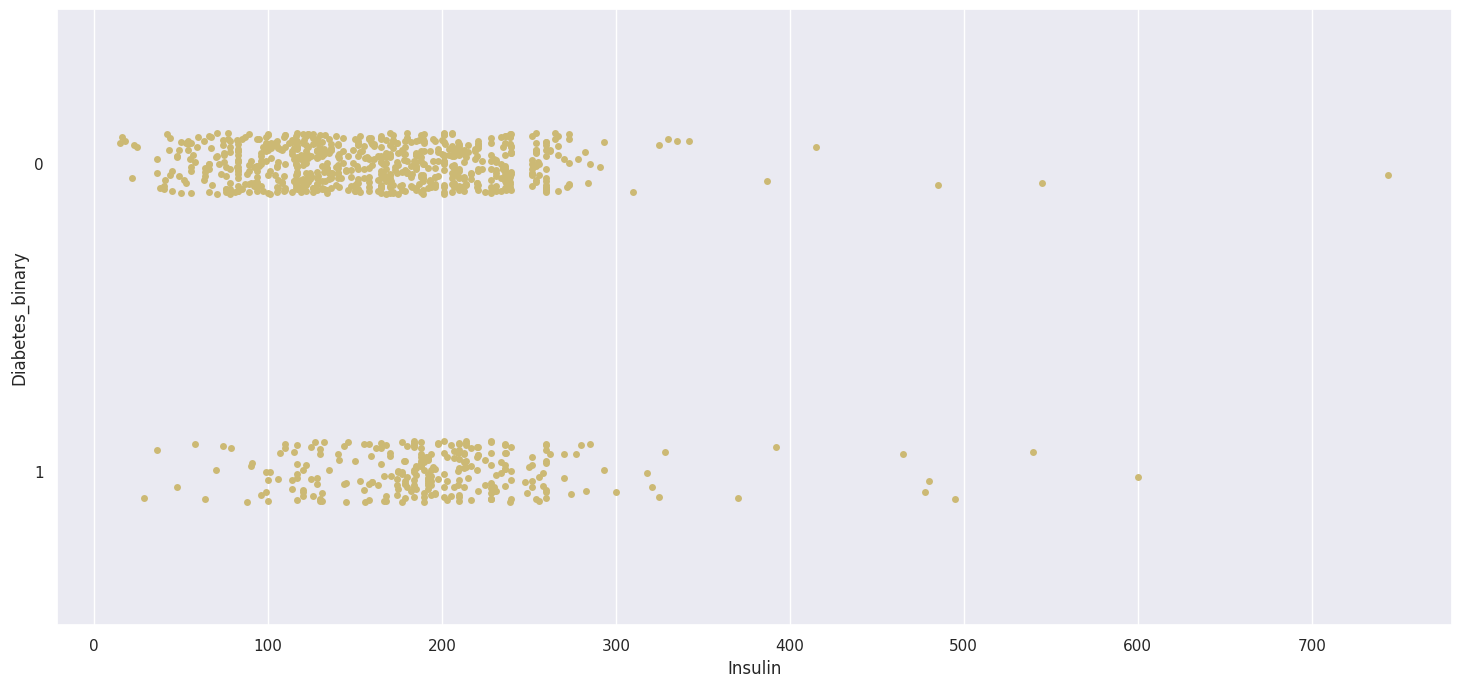

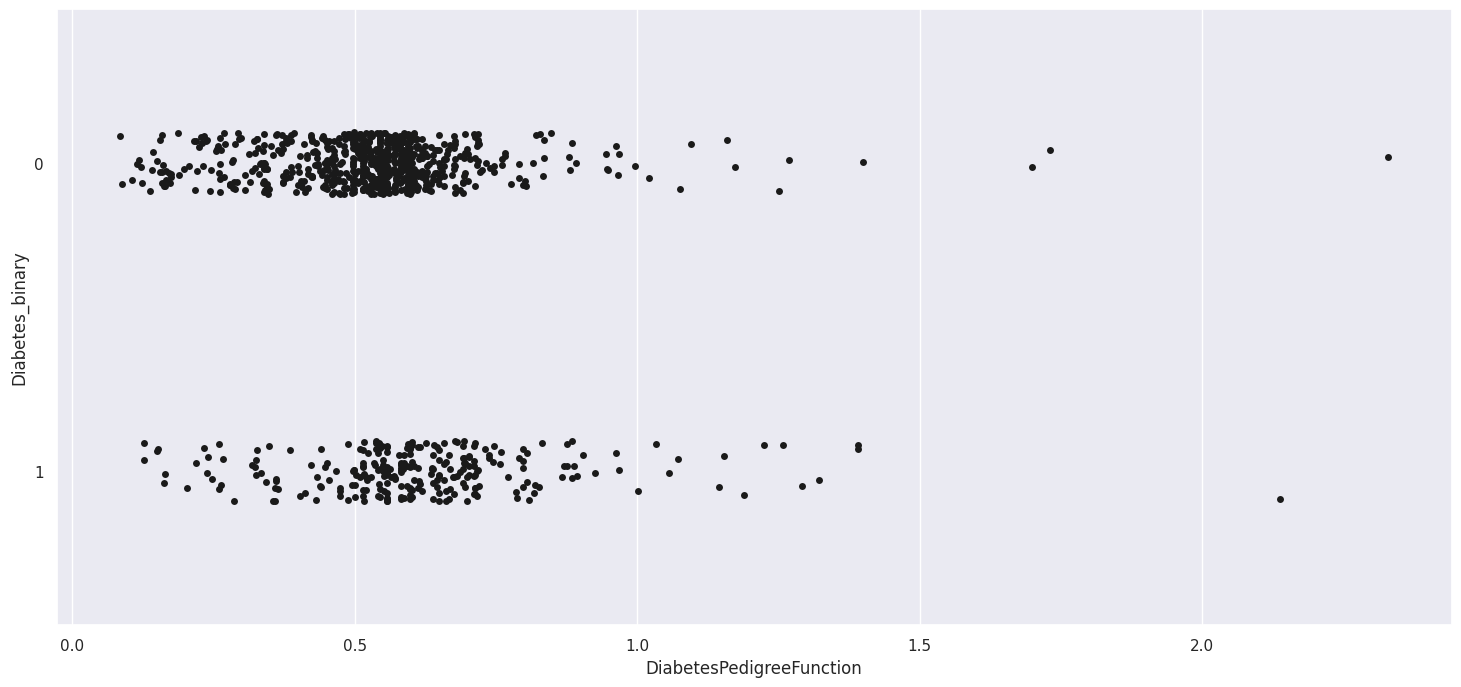

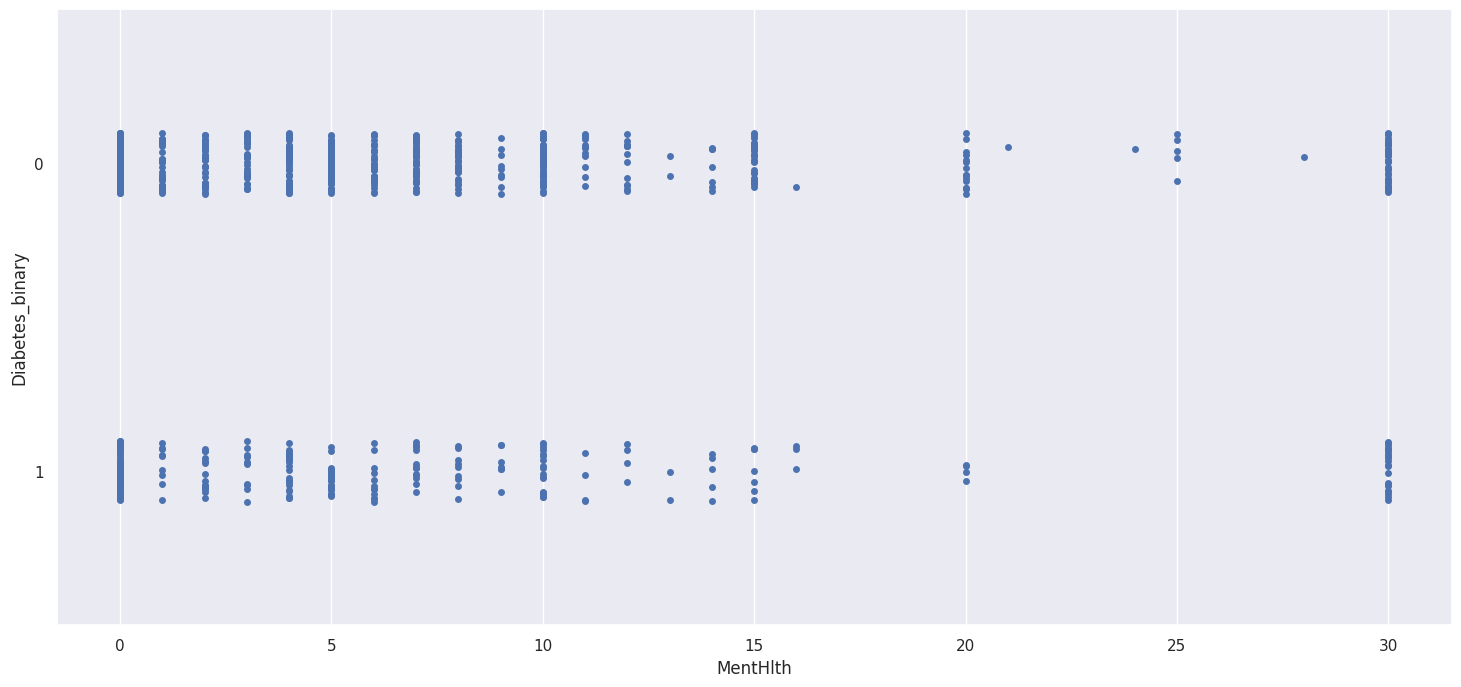

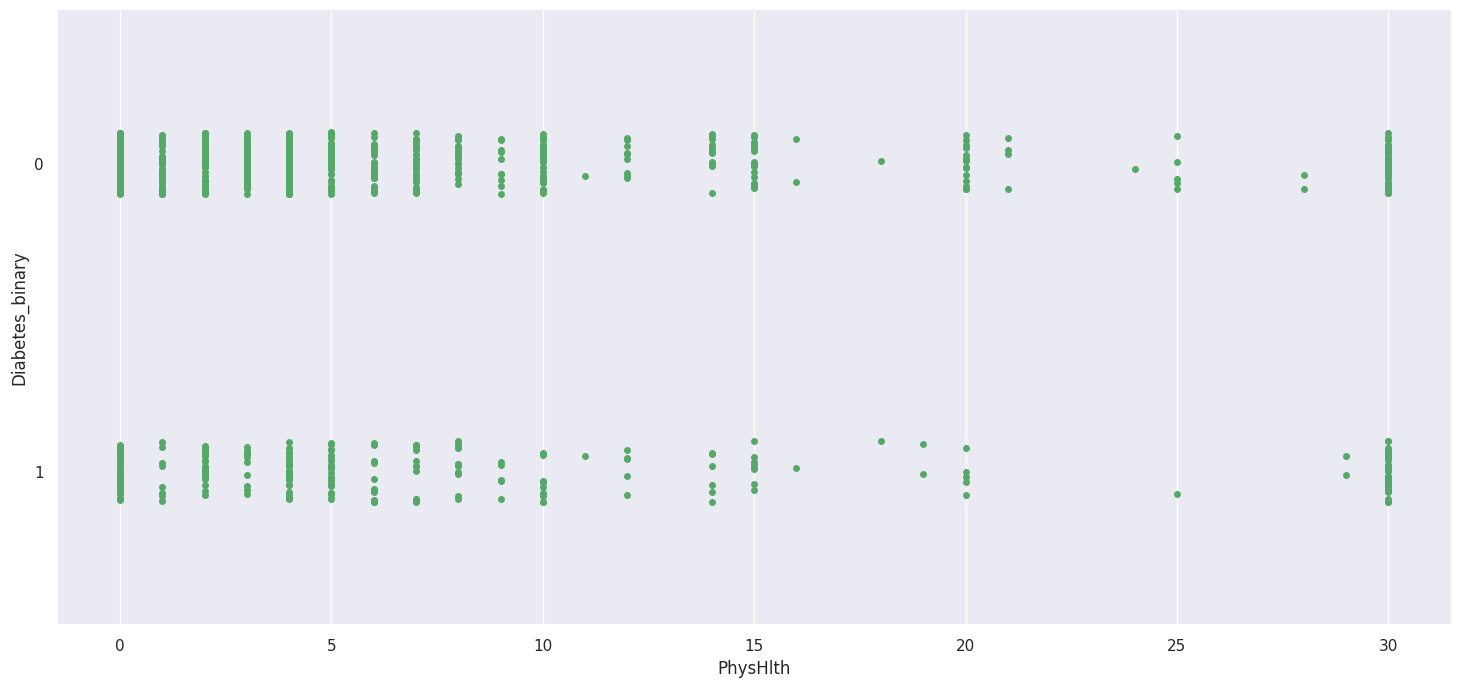

In [ ]:
#Plot a swarm plot
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k'] # To give the graphs different colors

count = 0
for var in numDF:
  f = plt.figure(figsize=(18, 8))
  sb.stripplot(x = var, y = "Diabetes_binary", data = JointData_knn_Imputer, orient = "h", color=colors[count%7])
  count+=1

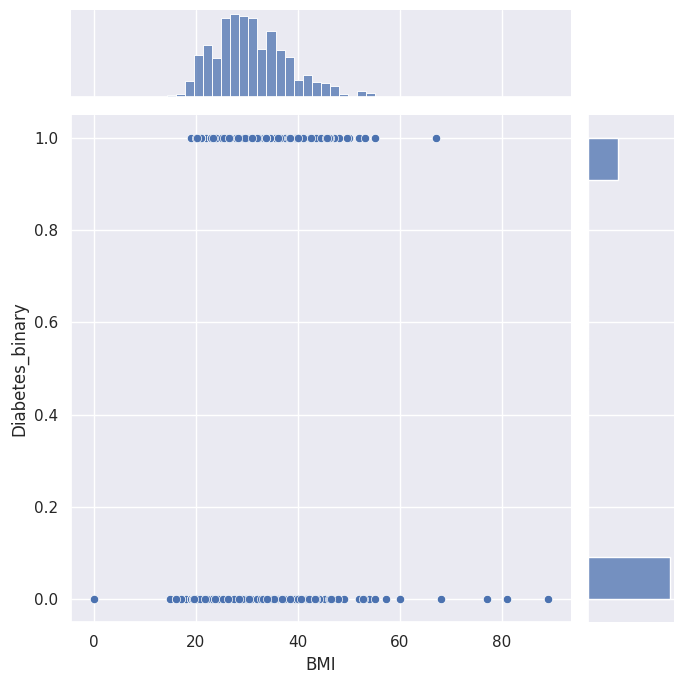

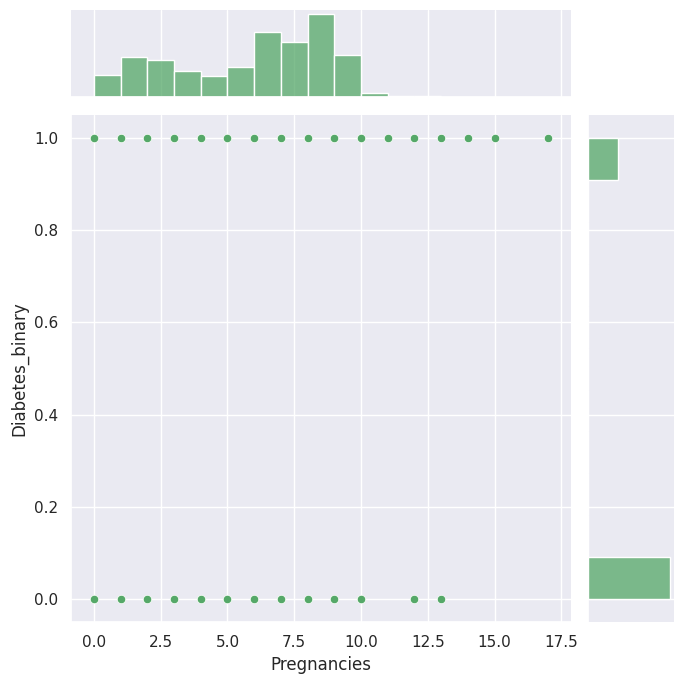

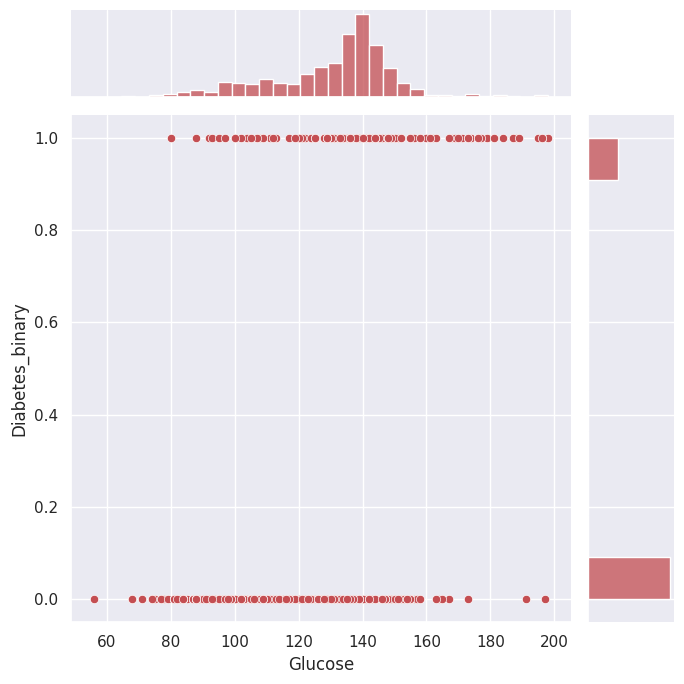

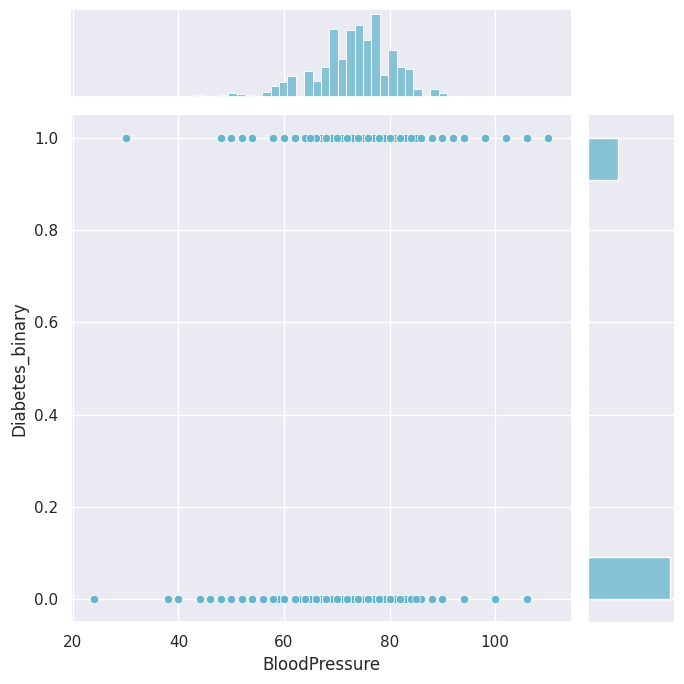

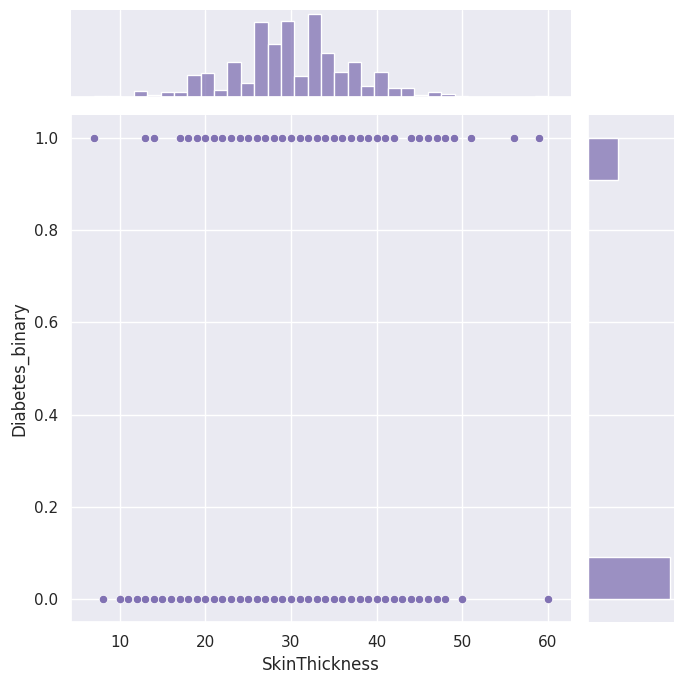

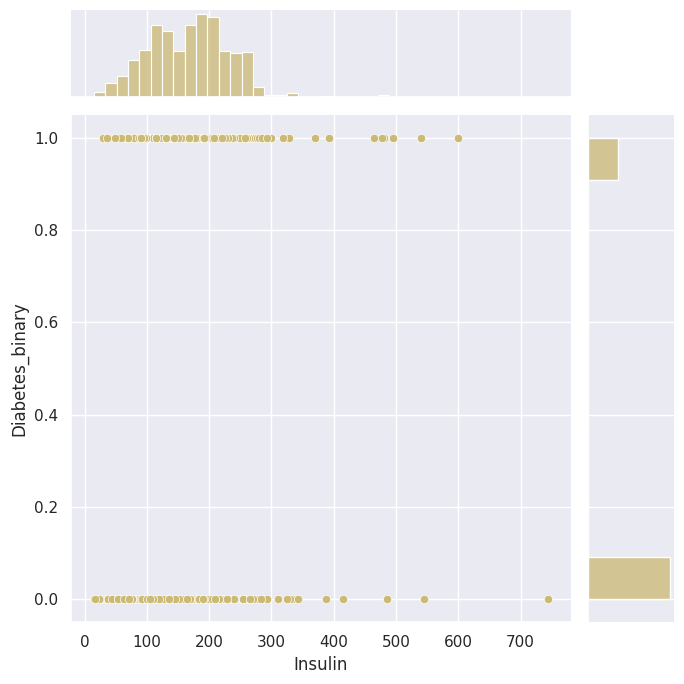

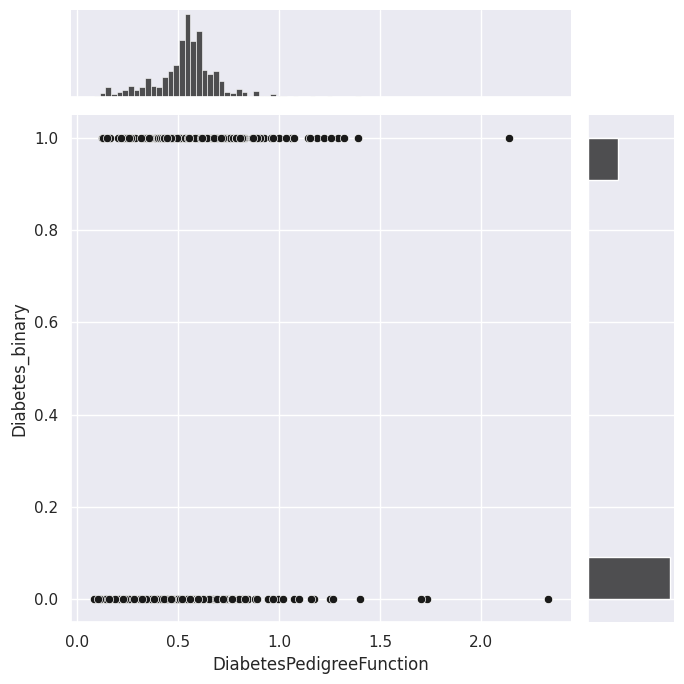

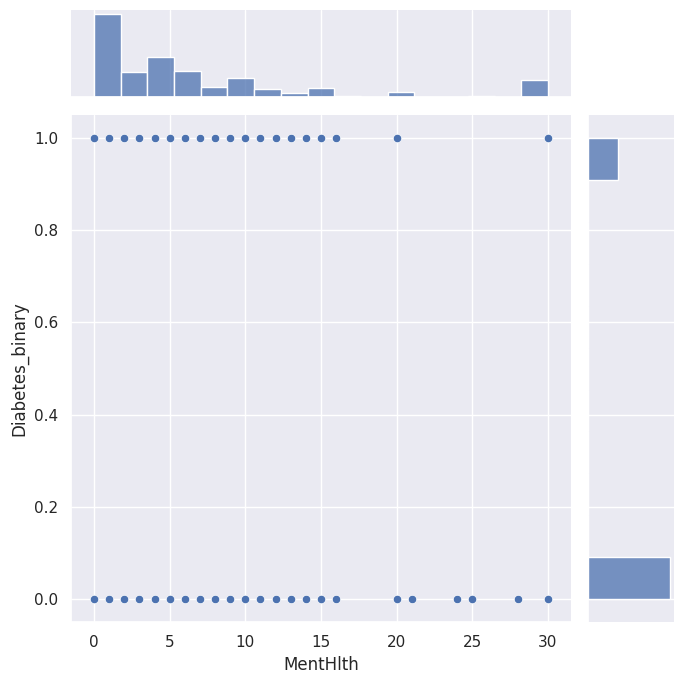

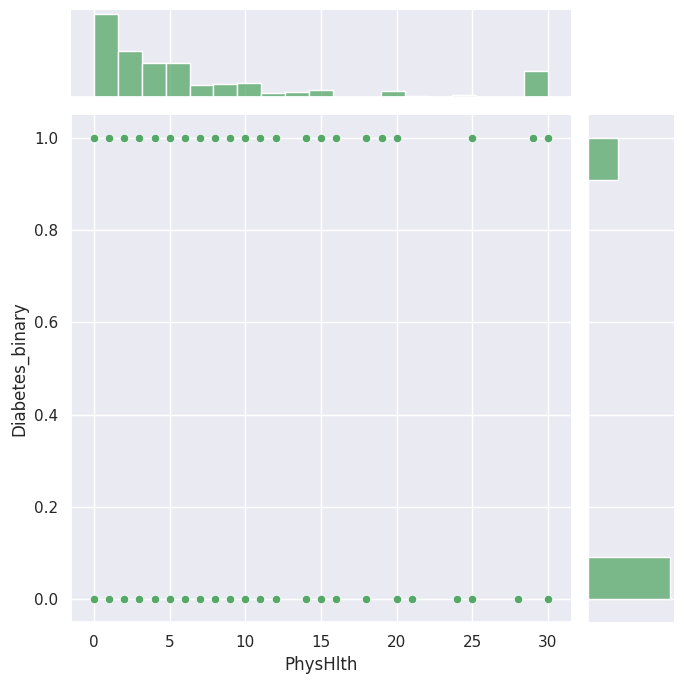

In [ ]:
#Explore the relationship between the each of the variables and Diabetes_binary using jointplot

colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k'] # To give the graphs different colors

count = 0
Outcome = pd.DataFrame(JointData_knn_Imputer["Diabetes_binary"])
x_max = float('-inf')
for var in numDF:
    Variable = pd.DataFrame(numDF[var])
    jointDF = pd.concat([Outcome, Variable], axis = 1).reindex(Outcome.index)
    sb.jointplot(data = jointDF, x = var, y = "Diabetes_binary", height= 7, color = colors[count%7]) # Independent variable in the x-axis
    count+=1
    plt.show()

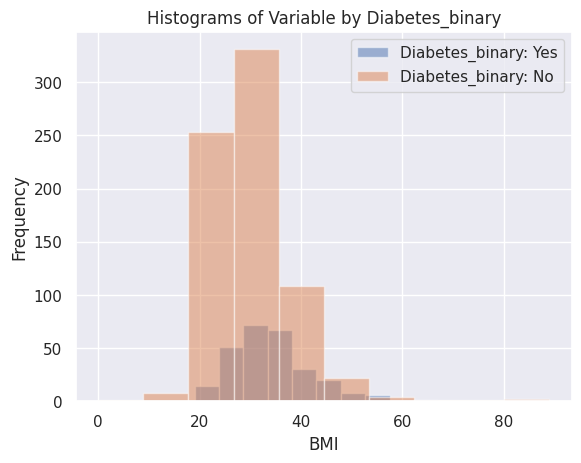

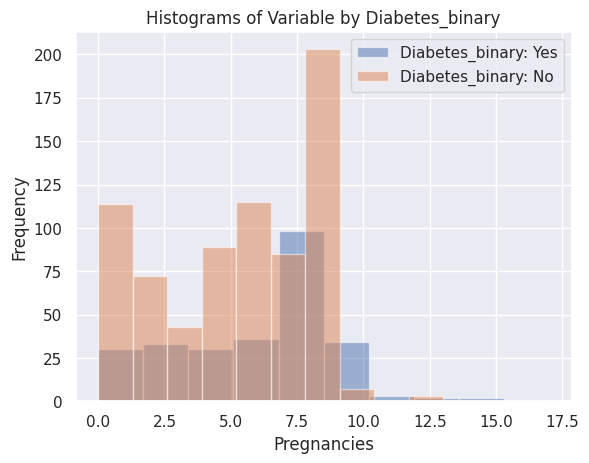

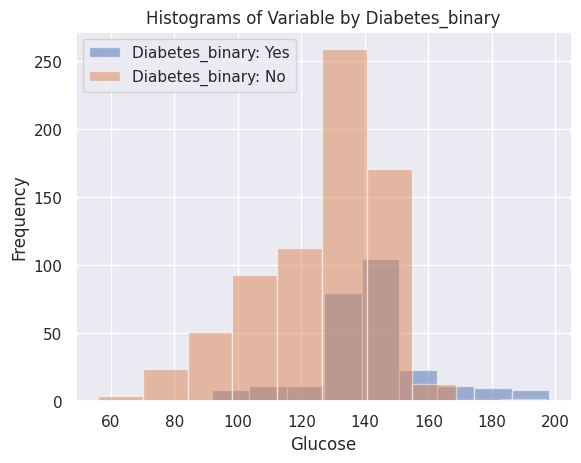

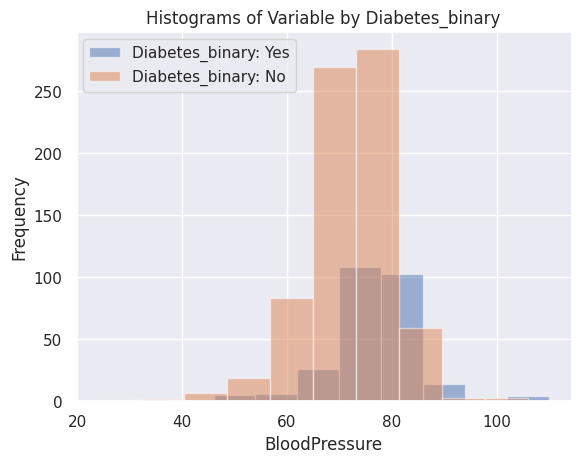

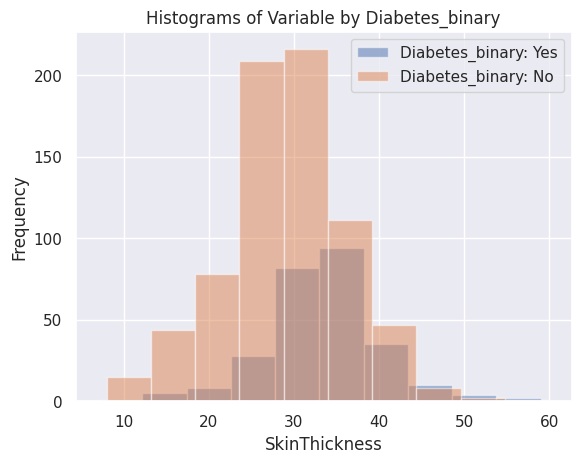

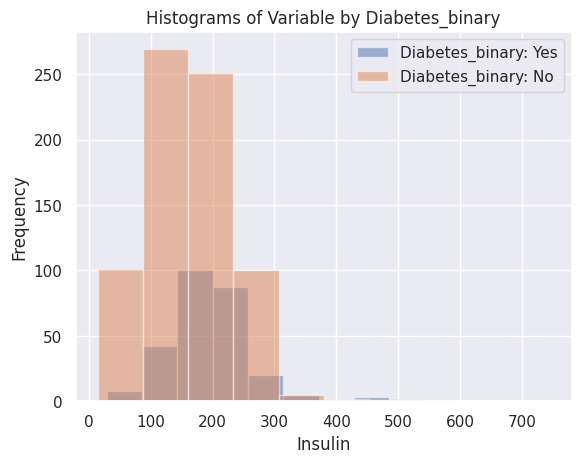

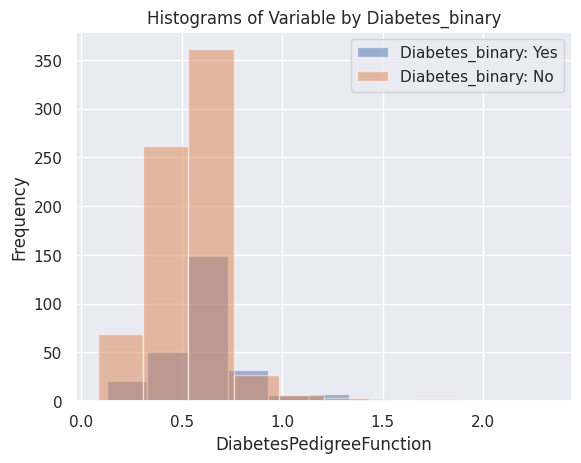

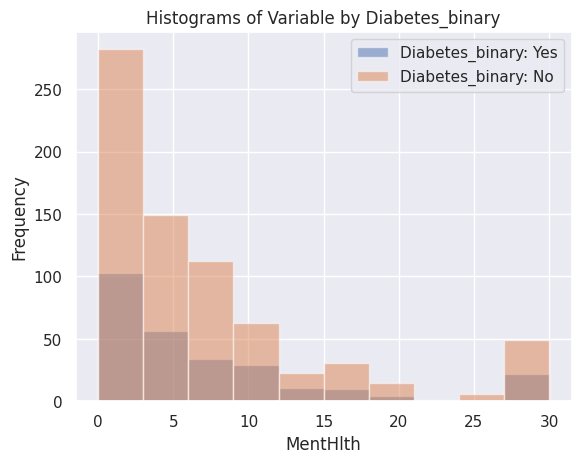

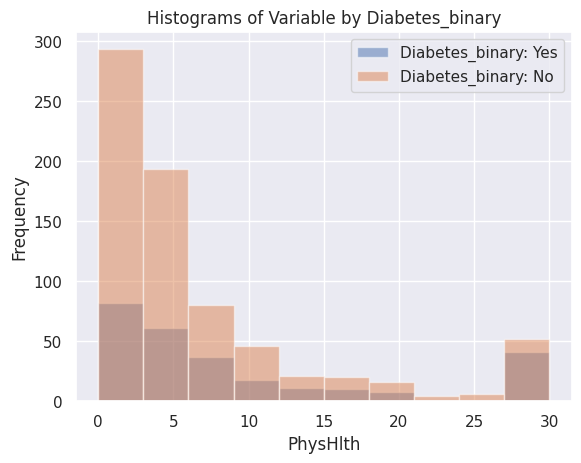

In [ ]:
#Histograms of the numeric variable separately for each level of the binary variable.
for var in numDF:
    Variable = pd.DataFrame(numDF[var])

    # Create separate DataFrames for each level of the binary variable
    var_yes = Variable[Outcome["Diabetes_binary"] == 1]
    var_no = Variable[Outcome["Diabetes_binary"] == 0]

    # Create histograms for each subset of data
    plt.hist(var_yes, bins=10, alpha=0.5, label='Diabetes_binary: Yes')
    plt.hist(var_no, bins=10, alpha=0.5, label='Diabetes_binary: No')


    plt.xlabel(var)
    plt.ylabel('Frequency')
    plt.title('Histograms of Variable by Diabetes_binary')
    plt.legend()

    plt.show()

### **Multi-Variate Data Exploration**

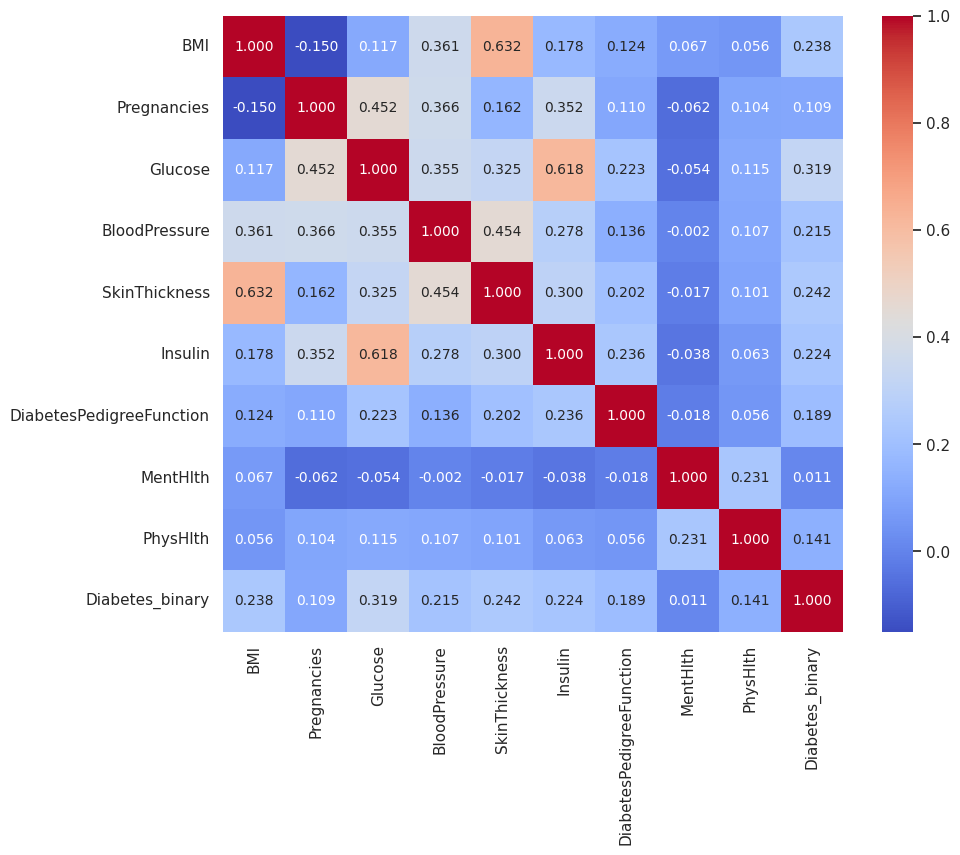

In [ ]:
# Create a correlation matrix
jointDF = pd.DataFrame(JointData_knn_Imputer[["BMI", "Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin", "DiabetesPedigreeFunction", "MentHlth", "PhysHlth", "Diabetes_binary"]])
corr_matrix = jointDF.corr()

# Set figure size
plt.figure(figsize=(10, 8))

# Create heatmap
sb.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.3f', annot_kws={'fontsize': 10})

# Show plot
plt.show()

## **Numerical Variables chosen for machine learning: Glucose, SkinThickness, BMI**


> Top three variables with the highest correlation with diabetes_binary may vary slighty after every run due to the random sampling of datapoints initially. We have selected Glucose, SkinThickness and BMI based on consistent observations across various runs.



# **EDA for Categorical Variables**

**Response variable:** Diabetes_binary

**Categorical predictor variables:** HighChol, Smoker, Stroke, HeartDiseaseorAttack, PhysActivity, HvyAlcoholConsump, DiffWalk, AgeLevel                     

In [ ]:
# Extract only the categorical variables
catDF = pd.DataFrame(CleanData[["HighChol", "Smoker", "Stroke", "HeartDiseaseorAttack", "PhysActivity", "HvyAlcoholConsump", "DiffWalk", "AgeLevel", "Diabetes_binary"]])

### **Uni-Variate Data Exploration** 

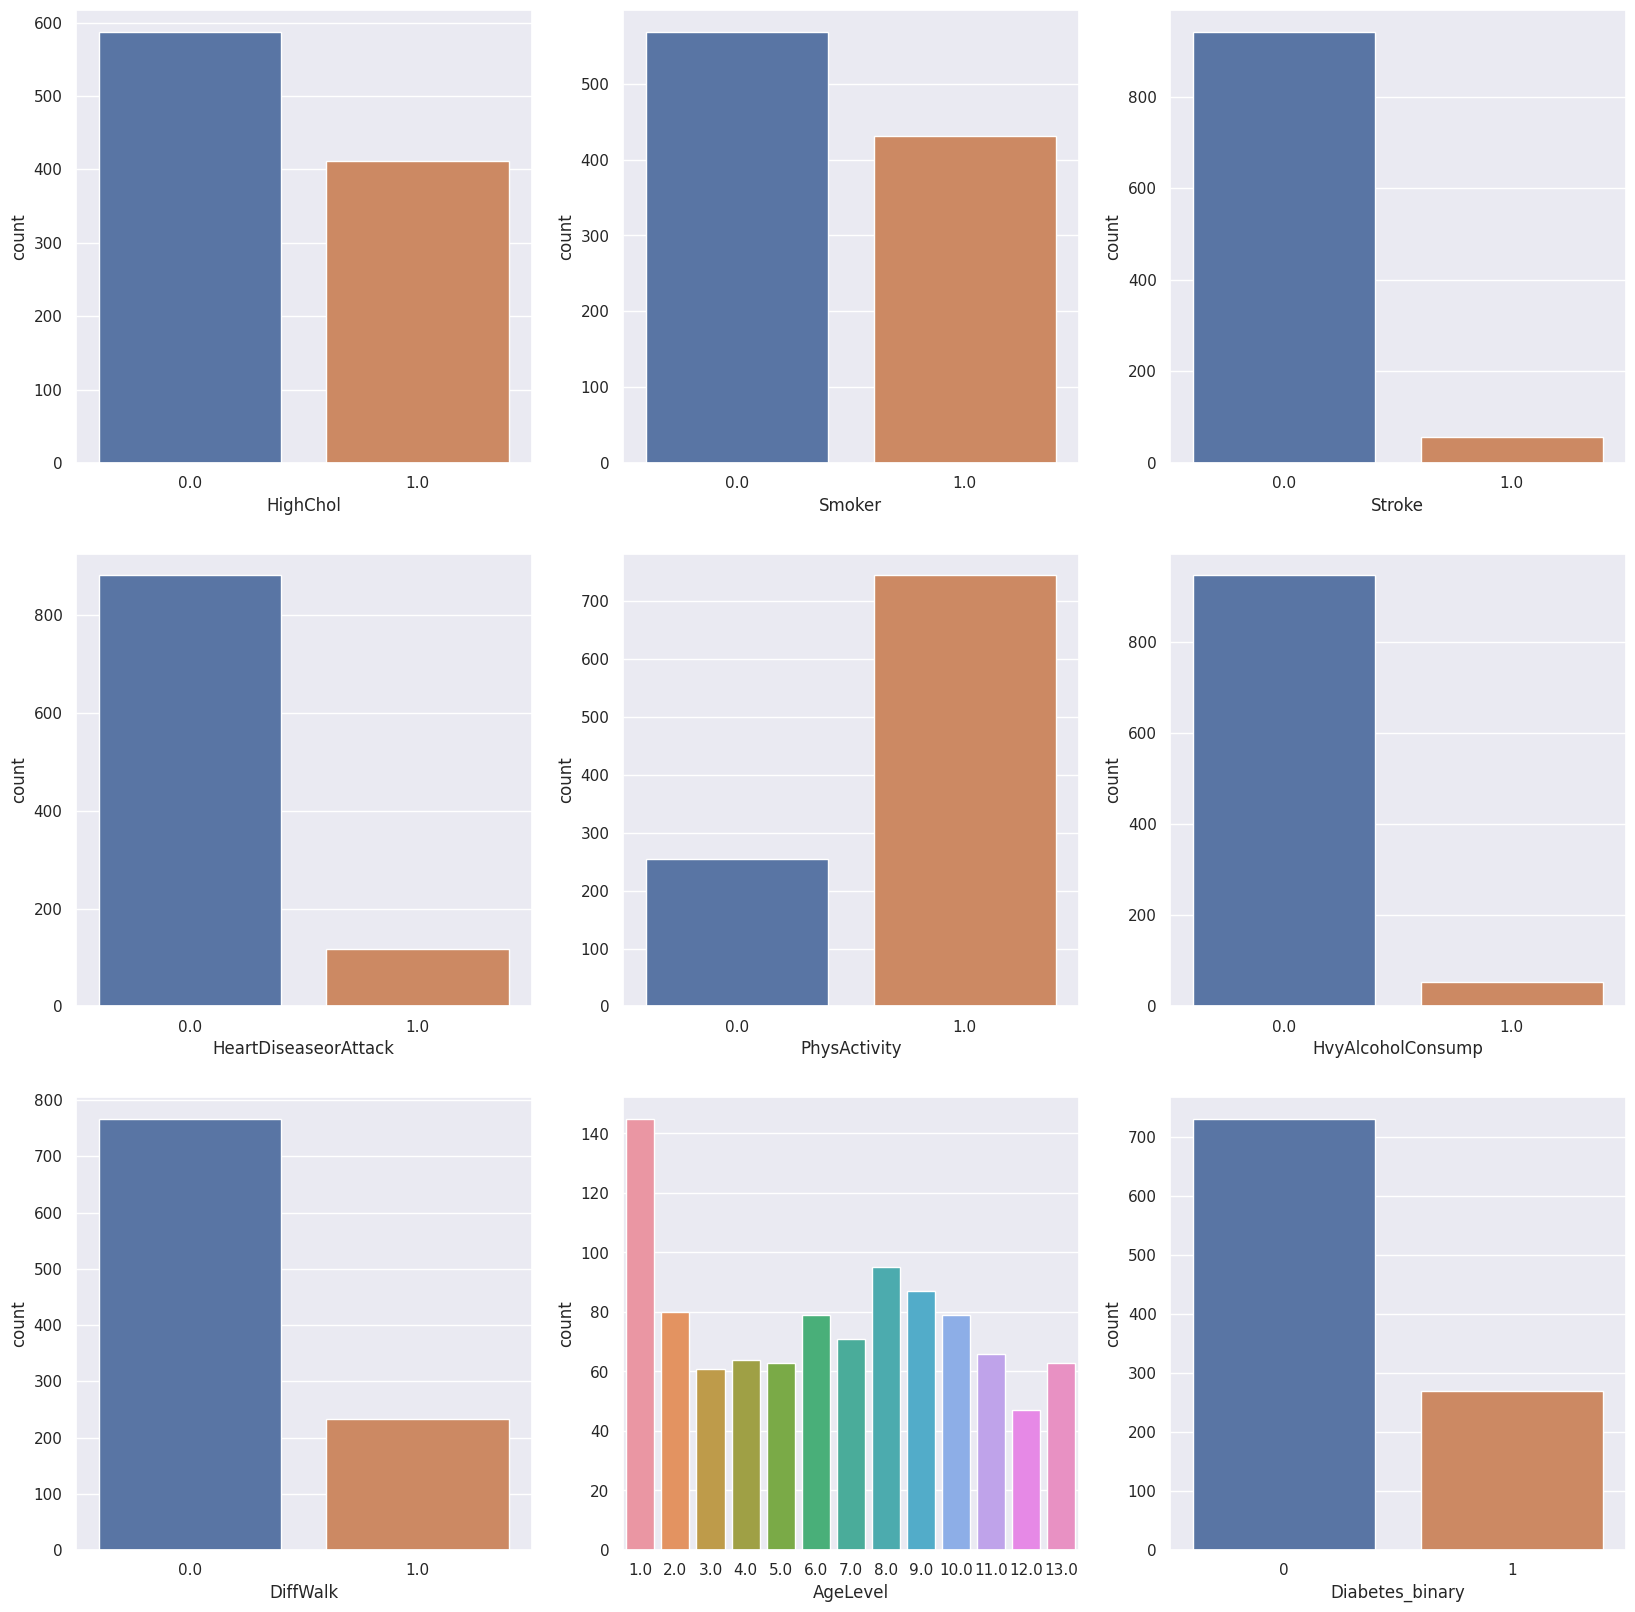

In [ ]:
f, axes = plt.subplots(3, 3, figsize=(20, 20))

# count plot on single categorical variable
sb.countplot(x ='HighChol', data = catDF, ax = axes[0,0])
sb.countplot(x ='Smoker', data = catDF, ax = axes[0,1])
sb.countplot(x ='Stroke', data = catDF, ax = axes[0,2])
sb.countplot(x ='HeartDiseaseorAttack', data = catDF, ax = axes[1,0])
sb.countplot(x ='PhysActivity', data = catDF, ax = axes[1,1])
sb.countplot(x ='HvyAlcoholConsump', data = catDF, ax = axes[1,2])
sb.countplot(x ='DiffWalk', data = catDF, ax = axes[2,0])
sb.countplot(x ='AgeLevel', data = catDF, ax = axes[2,1])
sb.countplot(x = "Diabetes_binary", data = catDF, ax = axes[2,2])
 
# Show the plot
plt.show()

### **Bi-Variate Data Exploration** 

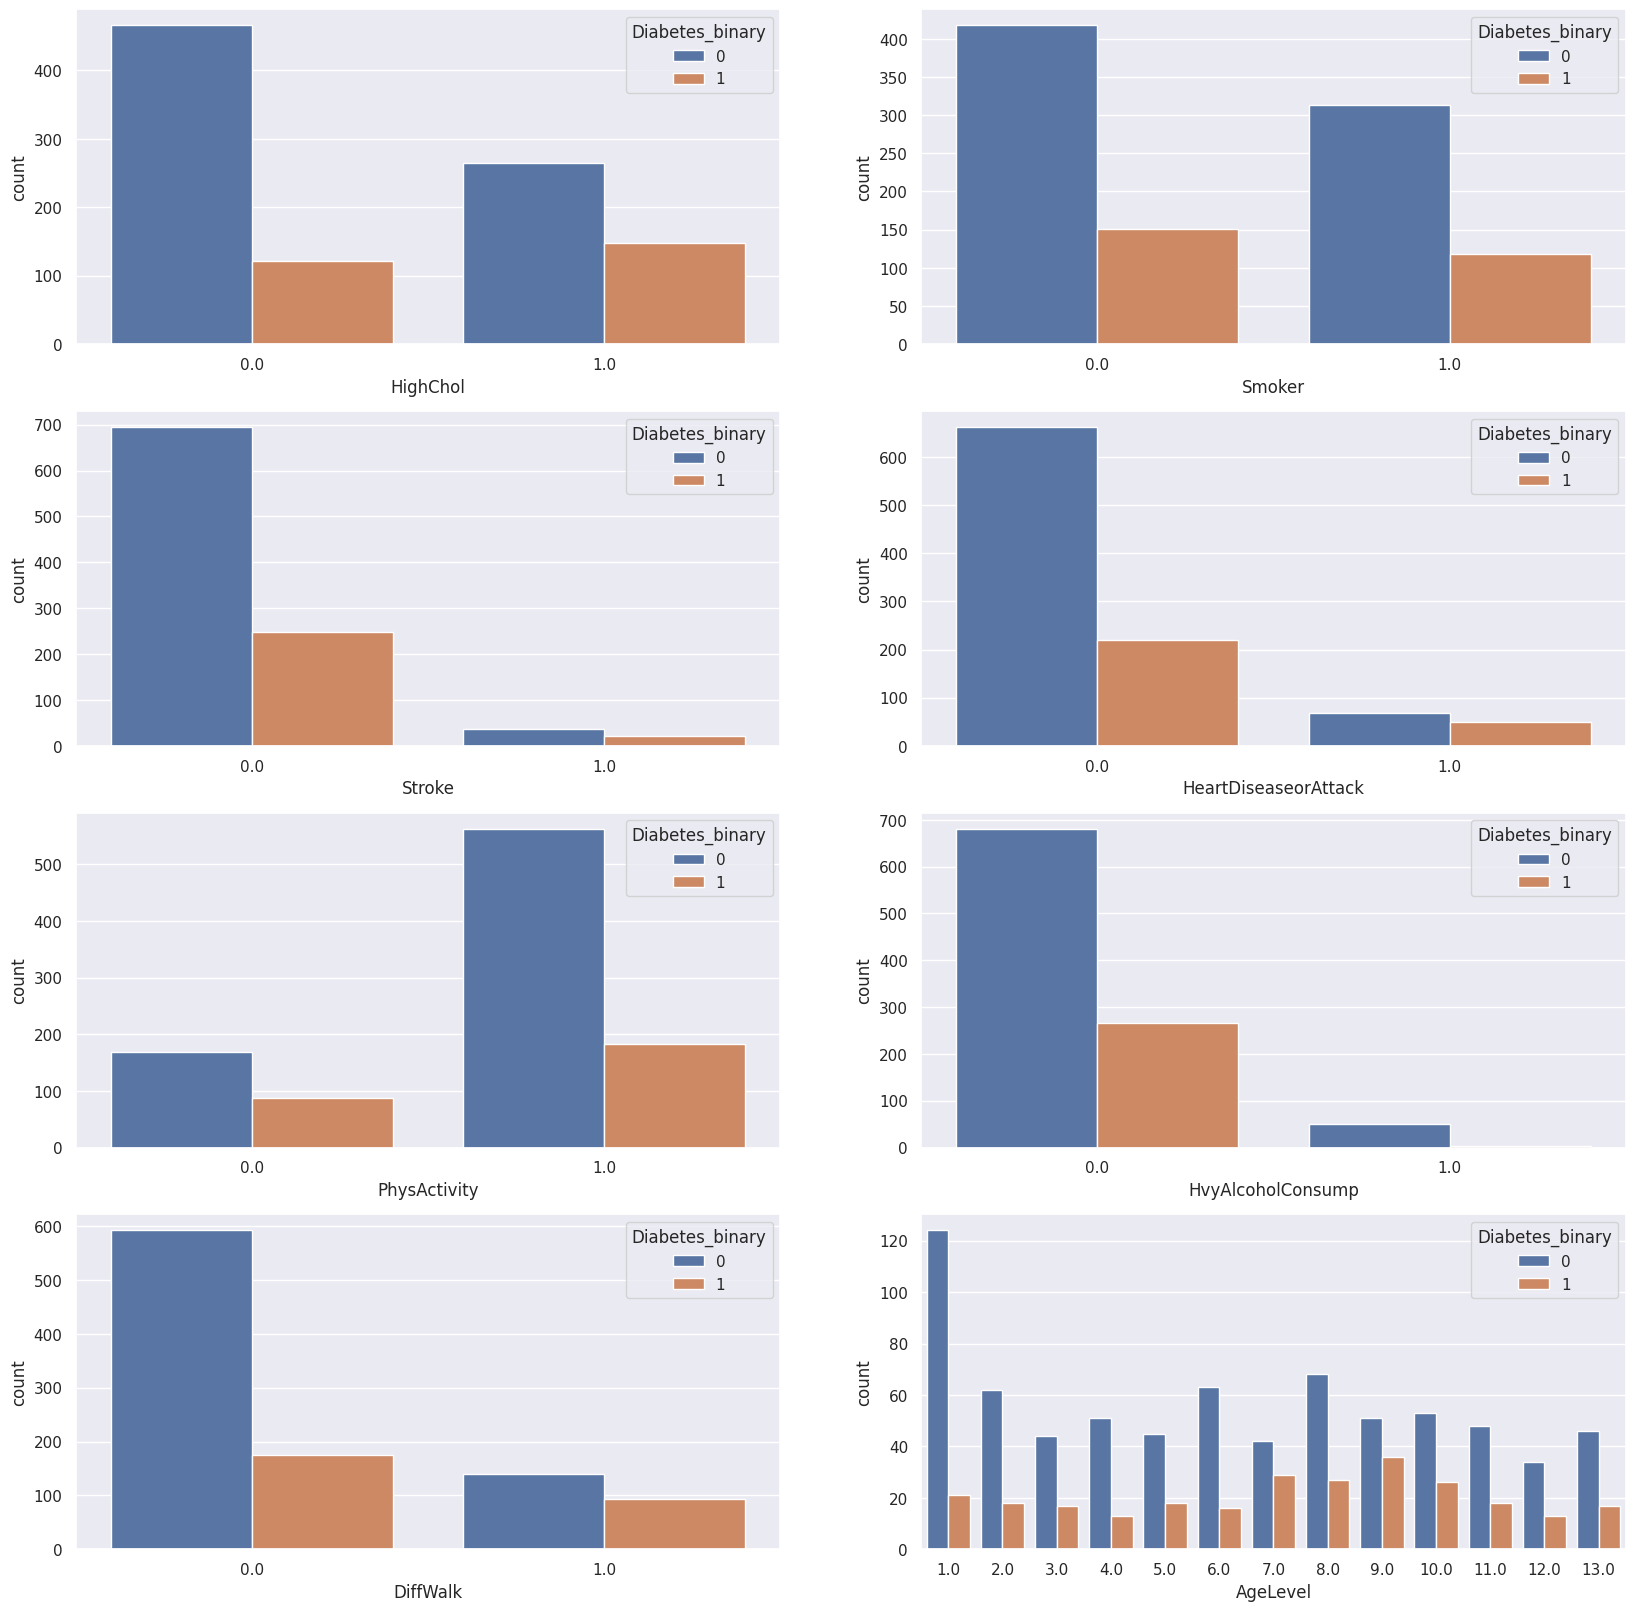

In [ ]:
f, axes = plt.subplots(4, 2, figsize=(20, 20))

# count plot on single categorical variable for each level of diabetes_binary
sb.countplot(x ='HighChol', hue= 'Diabetes_binary', data = catDF, ax = axes[0,0])
sb.countplot(x ='Smoker', hue= 'Diabetes_binary', data = catDF, ax = axes[0,1])
sb.countplot(x ='Stroke', hue= 'Diabetes_binary', data = catDF, ax = axes[1,0])
sb.countplot(x ='HeartDiseaseorAttack', hue= 'Diabetes_binary', data = catDF, ax = axes[1,1])
sb.countplot(x ='PhysActivity', hue= 'Diabetes_binary', data = catDF, ax = axes[2,0])
sb.countplot(x ='HvyAlcoholConsump', hue= 'Diabetes_binary', data = catDF, ax = axes[2,1])
sb.countplot(x ='DiffWalk', hue= 'Diabetes_binary', data = catDF, ax = axes[3,0])
sb.countplot(x ='AgeLevel', hue= 'Diabetes_binary', data = catDF, ax = axes[3,1])
 
# Show the plot
plt.show()

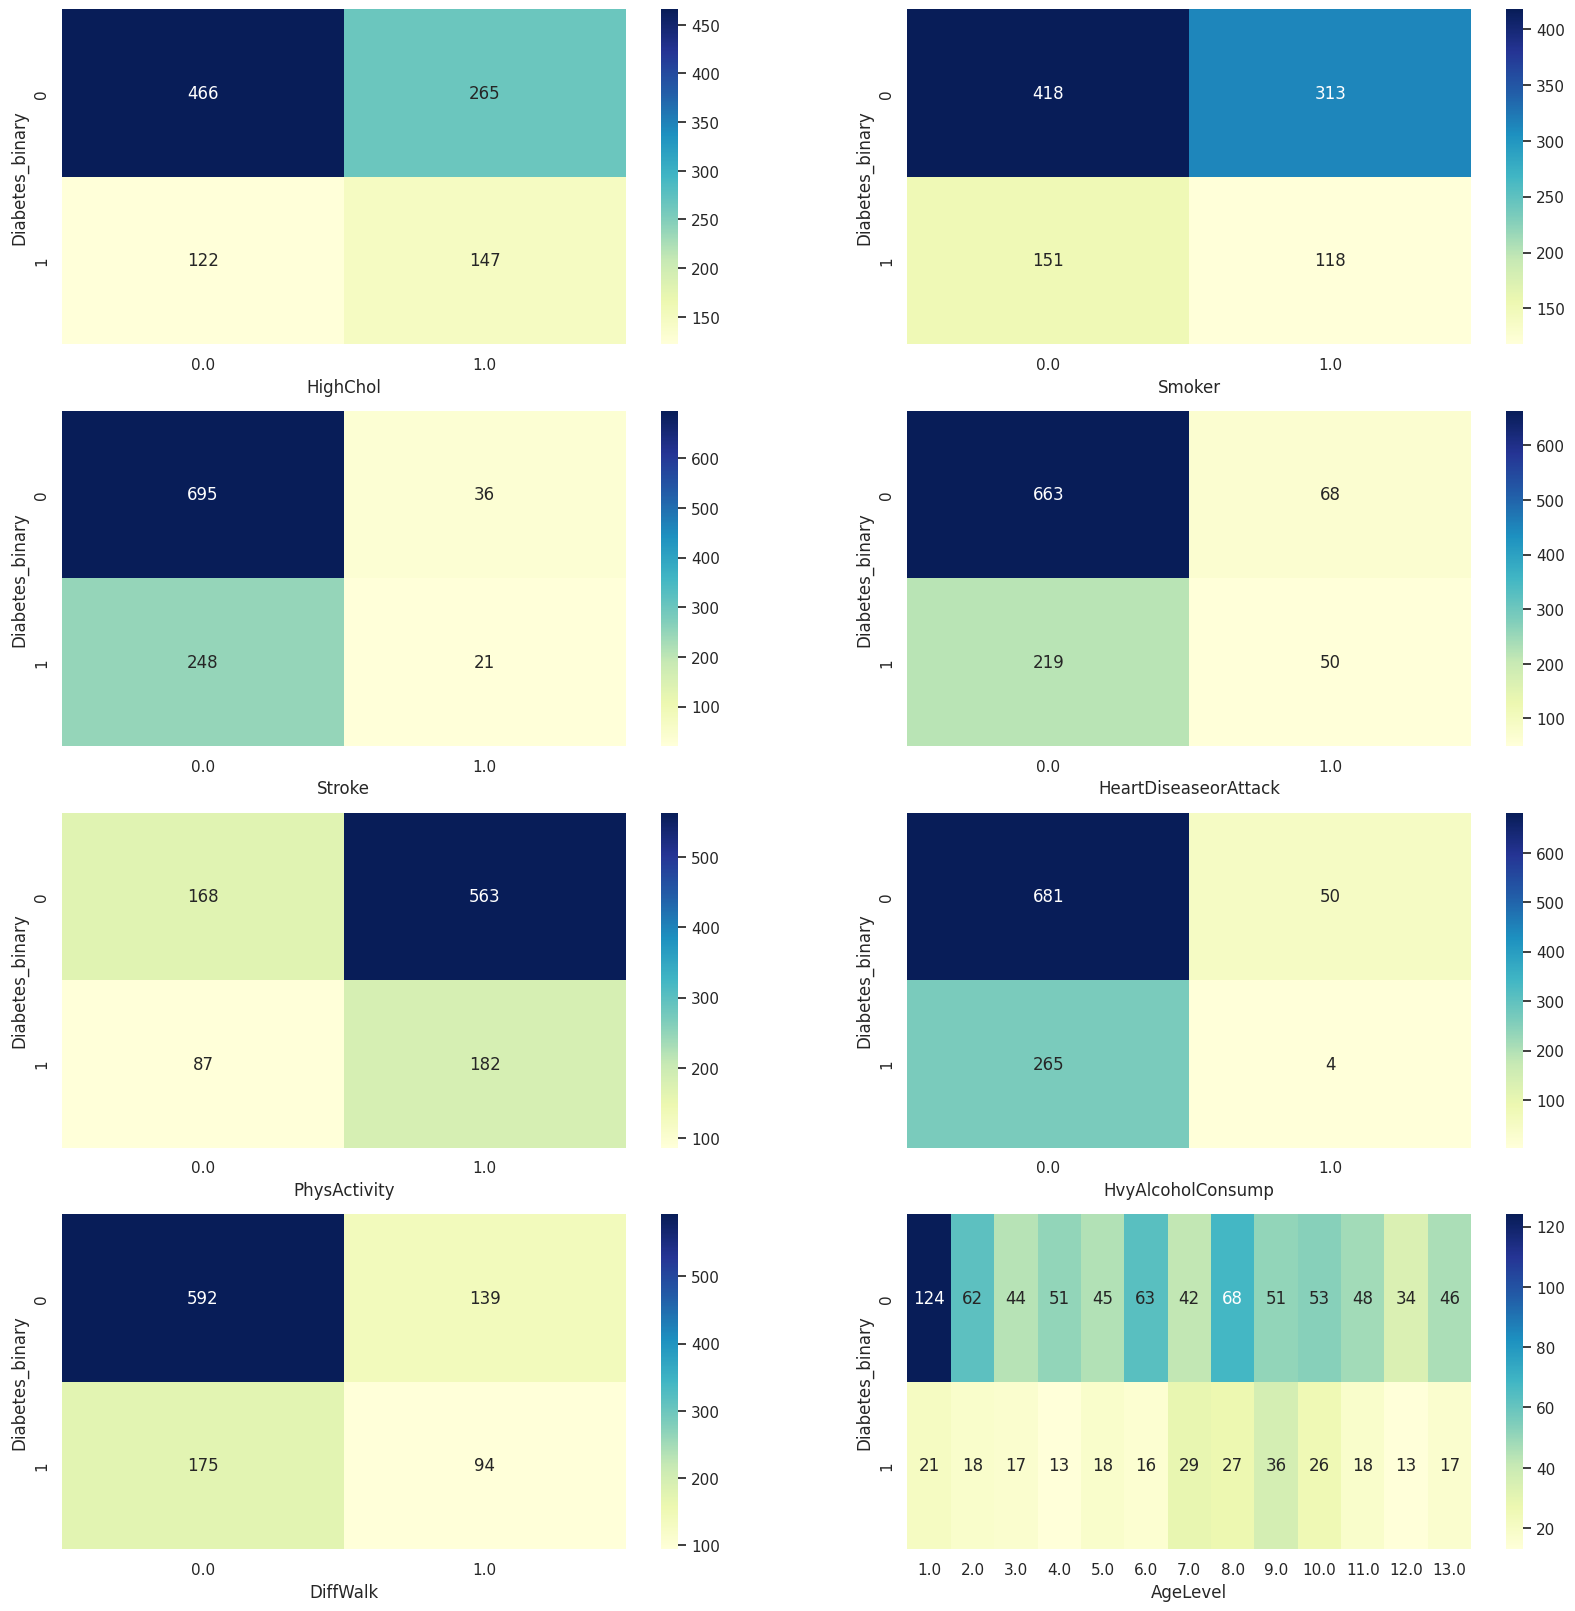

In [ ]:
#create heatmap
f, axes = plt.subplots(4, 2, figsize=(20, 20))

# Create contingency tables
table1 = pd.crosstab(catDF["Diabetes_binary"], catDF["HighChol"])
table2 = pd.crosstab(catDF["Diabetes_binary"], catDF["Smoker"])
table3 = pd.crosstab(catDF["Diabetes_binary"], catDF["Stroke"])
table4 = pd.crosstab(catDF["Diabetes_binary"], catDF["HeartDiseaseorAttack"])
table5 = pd.crosstab(catDF["Diabetes_binary"], catDF["PhysActivity"])
table6 = pd.crosstab(catDF["Diabetes_binary"], catDF["HvyAlcoholConsump"])
table7 = pd.crosstab(catDF["Diabetes_binary"], catDF["DiffWalk"])
table8 = pd.crosstab(catDF["Diabetes_binary"], catDF["AgeLevel"])

# Create a heatmap of the contingency tables
sb.heatmap(table1, annot=True, fmt=".0f", cmap="YlGnBu", ax = axes[0,0])
sb.heatmap(table2, annot=True, fmt=".0f", cmap="YlGnBu", ax = axes[0,1])
sb.heatmap(table3, annot=True, fmt=".0f", cmap="YlGnBu", ax = axes[1,0])
sb.heatmap(table4, annot=True, fmt=".0f", cmap="YlGnBu", ax = axes[1,1])
sb.heatmap(table5, annot=True, fmt=".0f", cmap="YlGnBu", ax = axes[2,0])
sb.heatmap(table6, annot=True, fmt=".0f", cmap="YlGnBu", ax = axes[2,1])
sb.heatmap(table7, annot=True, fmt=".0f", cmap="YlGnBu", ax = axes[3,0])
sb.heatmap(table8, annot=True, fmt=".0f", cmap="YlGnBu", ax = axes[3,1])

# Show the plot
plt.show()

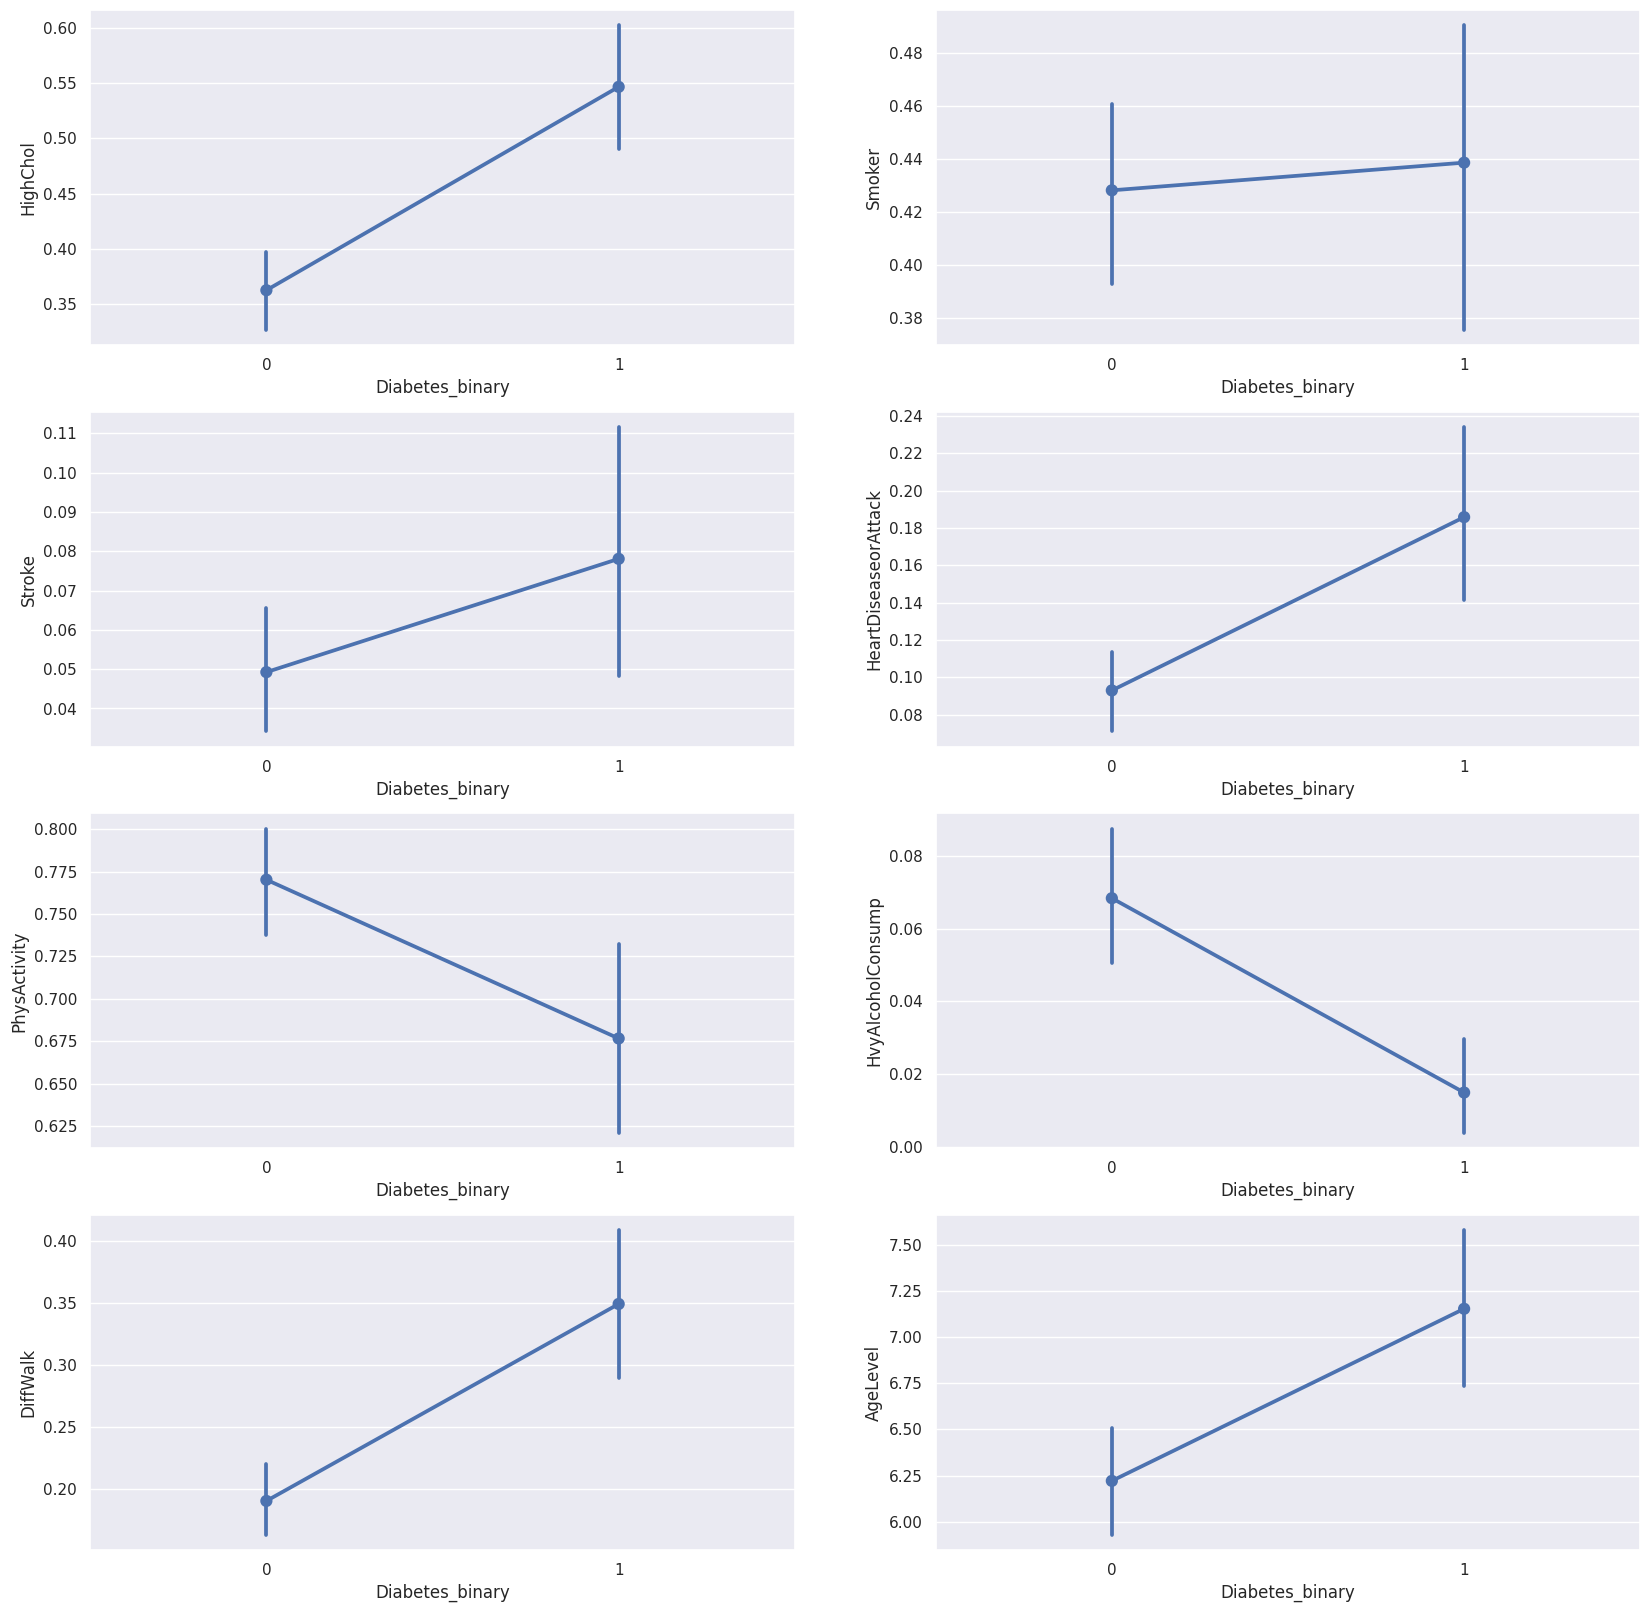

In [ ]:
f, axes = plt.subplots(4, 2, figsize=(20, 20))

# Create pointplots for each categorical variable against Diabetes_binary
sb.pointplot(x="Diabetes_binary", y="HighChol", data = catDF, ax = axes[0,0])
sb.pointplot(x="Diabetes_binary", y="Smoker", data = catDF, ax = axes[0,1])
sb.pointplot(x="Diabetes_binary", y="Stroke", data = catDF, ax = axes[1,0])
sb.pointplot(x="Diabetes_binary", y="HeartDiseaseorAttack", data = catDF, ax = axes[1,1])
sb.pointplot(x="Diabetes_binary", y="PhysActivity", data = catDF, ax = axes[2,0])
sb.pointplot(x="Diabetes_binary", y="HvyAlcoholConsump", data = catDF, ax = axes[2,1])
sb.pointplot(x="Diabetes_binary", y="DiffWalk", data = catDF, ax = axes[3,0])
sb.pointplot(x="Diabetes_binary", y="AgeLevel", data = catDF, ax = axes[3,1])

# Show the plot
plt.show()


In [ ]:
# Implementing Chi-Square test for categorical variables
from scipy.stats import chi2_contingency

# Create a list of variables to test
variables = ['Smoker', 'Stroke', 'HeartDiseaseorAttack', 'HighChol', 'PhysActivity', 'HvyAlcoholConsump', 'DiffWalk']

# Loop through variables and perform chi-square test
for var in variables:
    contingency_table = pd.crosstab(JointData_knn_Imputer['Diabetes_binary'], JointData_knn_Imputer[var])
    chi2, p_value, dof, expected_freq = chi2_contingency(contingency_table)
    print("Variable:", var)
    print("Chi-square statistic:", chi2)
    print("P-value:", p_value)
    print("Degrees of freedom:", dof)
    print("Expected frequencies:\n", expected_freq)
    print("---------------------------------------")

Variable: Smoker
Chi-square statistic: 0.05052968752898544
P-value: 0.822144128116816
Degrees of freedom: 1
Expected frequencies:
 [[415.939 315.061]
 [153.061 115.939]]
---------------------------------------
Variable: Stroke
Chi-square statistic: 2.5259265495563863
P-value: 0.11198898294191413
Degrees of freedom: 1
Expected frequencies:
 [[689.333  41.667]
 [253.667  15.333]]
---------------------------------------
Variable: HeartDiseaseorAttack
Chi-square statistic: 15.40876578564094
P-value: 8.658570673816698e-05
Degrees of freedom: 1
Expected frequencies:
 [[644.742  86.258]
 [237.258  31.742]]
---------------------------------------
Variable: HighChol
Chi-square statistic: 26.712265314401407
P-value: 2.3611795626347714e-07
Degrees of freedom: 1
Expected frequencies:
 [[429.828 301.172]
 [158.172 110.828]]
---------------------------------------
Variable: PhysActivity
Chi-square statistic: 8.581882035970851
P-value: 0.0033952426108873435
Degrees of freedom: 1
Expected frequencies:

## **Categorical Variables chosen for machine learning: DiffWalk, HeartDiseaseorAttack, HighChol**

> Top three variables with the highest chi-square statistic and lowest p-value with diabetes_binary may vary slighty after every run due to the random sampling of datapoints initially. We have selected DiffWalk, HeartDiseaseorAttack based on consistent observations across various runs.

